## 1. PyTorch에서 RNN, LSTM, GRU 사용법

PyTorch에서는 torch.nn.RNN, torch.nn.LSTM, torch.nn.GRU 클래스를 사용하여 순환 신경망을 쉽게 구현할 수 있습니다. 각 클래스는 공통적으로 아래와 같은 주요 파라미터를 가집니다.

- input_size: 입력 특성의 차원 (예: 피처 개수)

- hidden_size: 은닉 상태의 차원 (뉴런 개수)

- num_layers: RNN의 레이어 개수 (층이 깊을수록 복잡한 패턴 학습 가능)

- batch_first: True이면 입력 텐서의 첫 번째 차원이 배치 크기가 됨 (기본값은 False)

- dropout: 층 간 드롭아웃 적용 여부 (과적합 방지)

- bidirectional: 양방향 RNN 사용 여부 (기본값 False)

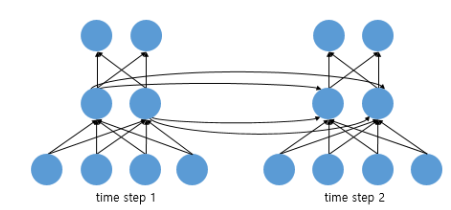

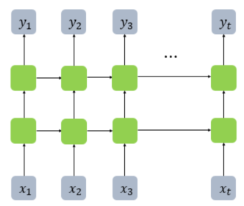

## RNN

In [23]:
import torch
import torch.nn as nn

rnn = nn.RNN(input_size=10, hidden_size=4, num_layers=2, batch_first=False)

x = torch.randn(3,6,10)  # --> seq_len, batch_size, input_size
out, hidden = rnn(x)
print(out.shape, hidden.shape)

torch.Size([3, 6, 4]) torch.Size([2, 6, 4])


In [24]:
out[-1,:,:]

tensor([[ 0.3878, -0.7866,  0.1648, -0.8596],
        [ 0.1833, -0.3655,  0.4917, -0.2884],
        [ 0.4325, -0.8770,  0.4793, -0.8078],
        [ 0.1724, -0.1941,  0.6614, -0.5792],
        [ 0.0921, -0.6968,  0.3178, -0.7145],
        [ 0.0924, -0.8155,  0.3199, -0.7163]], grad_fn=<SelectBackward0>)

In [25]:
hidden[-1]

tensor([[ 0.3878, -0.7866,  0.1648, -0.8596],
        [ 0.1833, -0.3655,  0.4917, -0.2884],
        [ 0.4325, -0.8770,  0.4793, -0.8078],
        [ 0.1724, -0.1941,  0.6614, -0.5792],
        [ 0.0921, -0.6968,  0.3178, -0.7145],
        [ 0.0924, -0.8155,  0.3199, -0.7163]], grad_fn=<SelectBackward0>)

In [26]:
import torch
import torch.nn as nn

rnn = nn.RNN(input_size=10, hidden_size=4, num_layers=2, batch_first=True)

x = torch.randn(6,3,10)  # --> batch_size, seq_len, input_size
out, hidden = rnn(x) # out: batch_size, seq_len, hidden_size  / hidden : num_layers, batch_size, hidden_size
print(out.shape, hidden.shape)

torch.Size([6, 3, 4]) torch.Size([2, 6, 4])


In [27]:
out[:,-1,:]

tensor([[ 0.5551, -0.6925, -0.3917,  0.4404],
        [ 0.2909, -0.2036, -0.2852, -0.4719],
        [-0.0604, -0.2384,  0.0530, -0.3298],
        [-0.5273, -0.4193,  0.0131, -0.0766],
        [ 0.8721, -0.7719, -0.7320,  0.2046],
        [-0.1611, -0.3554, -0.0383,  0.4988]], grad_fn=<SelectBackward0>)

In [29]:
hidden[-1]

tensor([[ 0.5551, -0.6925, -0.3917,  0.4404],
        [ 0.2909, -0.2036, -0.2852, -0.4719],
        [-0.0604, -0.2384,  0.0530, -0.3298],
        [-0.5273, -0.4193,  0.0131, -0.0766],
        [ 0.8721, -0.7719, -0.7320,  0.2046],
        [-0.1611, -0.3554, -0.0383,  0.4988]], grad_fn=<SelectBackward0>)

In [30]:
print(torch.allclose(out[:,-1,:], hidden[-1]))
# 마지막 출력 값 == 마지막 hidden 값

True


## LSTM

In [45]:
lstm = nn.LSTM(input_size=10, hidden_size=4, num_layers=2, batch_first=True)

x = torch.randn(6, 3, 10)

out, hidden = lstm(x)
(hidden, cell) = hidden

print(out.shape, hidden.shape, cell.shape)

torch.Size([6, 3, 4]) torch.Size([2, 6, 4]) torch.Size([2, 6, 4])


- out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size])

- hidden: 마지막 타임스텝의 은닉 상태 ([num_layers, batch_size, hidden_size])

- cell: 마지막 타임스텝의 셀 상태 ([num_layers, batch_size, hidden_size])



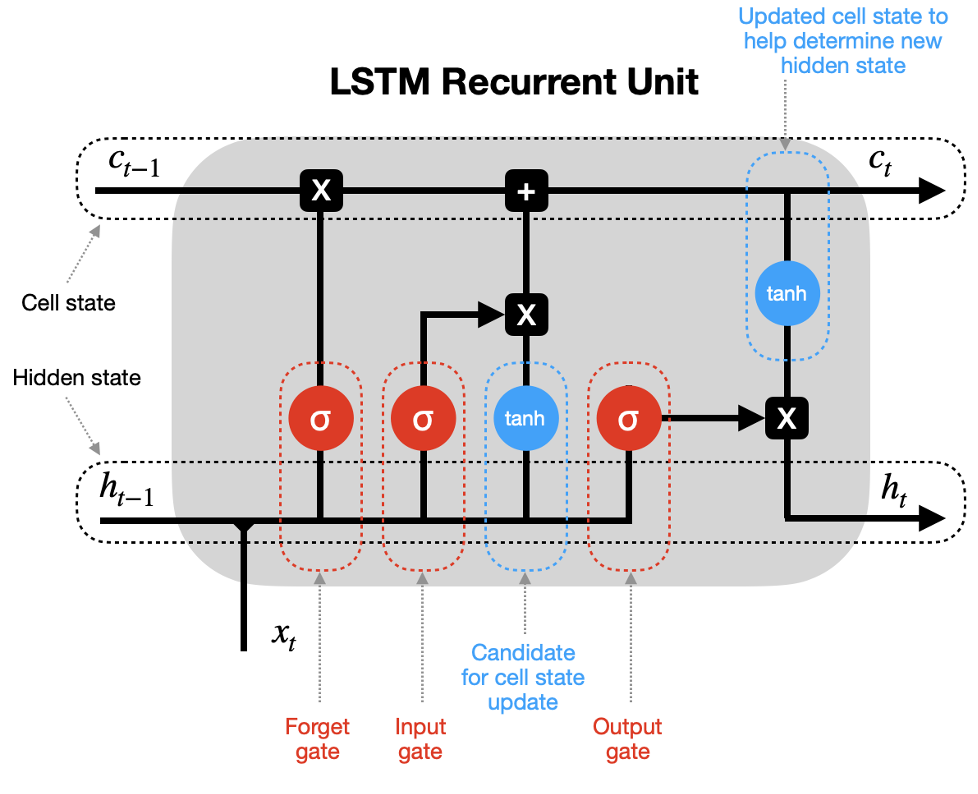

In [46]:
out[:,-1,:]

tensor([[-0.1081, -0.1849, -0.2140,  0.2358],
        [-0.0907, -0.1628, -0.2009,  0.2315],
        [-0.1273, -0.1560, -0.1965,  0.2118],
        [-0.0469, -0.1868, -0.2372,  0.2375],
        [-0.0840, -0.1686, -0.1949,  0.2691],
        [-0.1258, -0.1674, -0.2047,  0.2429]], grad_fn=<SelectBackward0>)

In [47]:
hidden[-1]

tensor([[-0.1081, -0.1849, -0.2140,  0.2358],
        [-0.0907, -0.1628, -0.2009,  0.2315],
        [-0.1273, -0.1560, -0.1965,  0.2118],
        [-0.0469, -0.1868, -0.2372,  0.2375],
        [-0.0840, -0.1686, -0.1949,  0.2691],
        [-0.1258, -0.1674, -0.2047,  0.2429]], grad_fn=<SelectBackward0>)

In [48]:
cell[-1]

tensor([[-0.1594, -0.3462, -0.5048,  0.4133],
        [-0.1351, -0.3128, -0.4857,  0.4218],
        [-0.1927, -0.3166, -0.4944,  0.3920],
        [-0.0723, -0.4228, -0.5329,  0.4379],
        [-0.1245, -0.2989, -0.4644,  0.5065],
        [-0.1926, -0.3297, -0.4847,  0.4723]], grad_fn=<SelectBackward0>)

## GRU

In [49]:
gru = nn.GRU(input_size=10, hidden_size=4, num_layers=2, batch_first=True)
x = torch.randn(6,3,10)

out, hidden = gru(x)

print(out.shape, hidden.shape)

torch.Size([6, 3, 4]) torch.Size([2, 6, 4])


## 시계열 데이터 실습

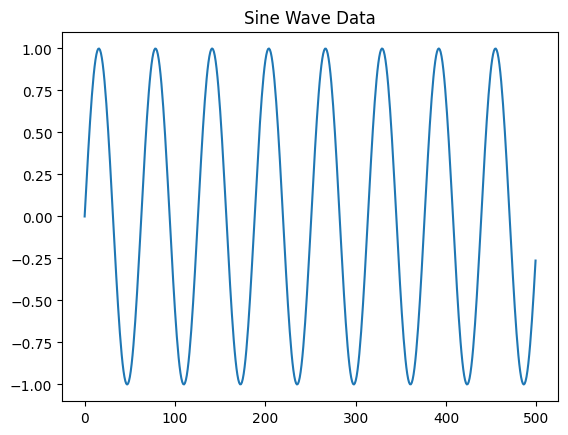

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def gen_sine_wave(seq_len, num_samples):
    x = np.linspace(0, seq_len, num_samples)
    y = np.sin(x)
    return y

data = gen_sine_wave(seq_len=50, num_samples=500)
plt.plot(data)
plt.title("Sine Wave Data")
plt.show()

In [61]:
import torch

def create_sequences(data, seq_length):
    sequences = []
    labels = []

    for i in range(len(data)- seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])

    sequences = torch.tensor(np.array(sequences), dtype=torch.float32).unsqueeze(-1)
    labels = torch.tensor(np.array(labels), dtype=torch.float32)

    return sequences, labels

X, y = create_sequences(data, seq_length=50)
print(X.shape, y.shape)

torch.Size([450, 50, 1]) torch.Size([450])


In [62]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)    # out : [450, 50, hidden_size]
        ht = out[:,-1,:]        # ht  : [450, hidden_size]
        return self.fc(ht)      # output : [450, 1]


In [64]:
seq_length = 50
num_samples = 500
data = gen_sine_wave(seq_length, num_samples)
X, y = create_sequences(data, seq_length)

print(X.shape, y.shape)

torch.Size([450, 50, 1]) torch.Size([450])


In [66]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [67]:
# 모델 초기화
input_size = 1
hidden_size = 20
num_layers = 2
model = RNNModel(input_size, hidden_size, num_layers).to(device)

---

### 🧠 요약

| 단계 | 구성 요소         | 입력 텐서       | 출력 텐서       |
|------|------------------|------------------|------------------|
| 입력 | 시계열 데이터     | `[450, 50, 1]`   | -                |
| RNN Layer 1 | `nn.RNN(1, 20)` | `[450, 50, 1]`   | `[450, 50, 20]`  |
| RNN Layer 2 | `num_layers=2`  | `[450, 50, 20]`  | `[450, 50, 20]`  |
| 마지막 상태 선택 | `out[:, -1, :]` | `[450, 50, 20]`  | `[450, 20]`      |
| 출력층 | `Linear(20 → 1)` | `[450, 20]`      | `[450, 1]`       |

---

### 🔍 설명

- **배치 크기 450**: 450개의 독립된 시계열 샘플을 병렬 처리.
- **시퀀스 길이 50**: 각 시계열은 50개의 time step으로 구성됨.
- **입력 차원 1**: 단변량 시계열 (예: 온도, 주가 등).
- **RNN Layer**: 두 개의 계층으로 구성되어 시퀀스 정보를 단계적으로 추출.
- **Linear Layer**: 마지막 time step의 출력을 받아 스칼라 값으로 매핑.

---

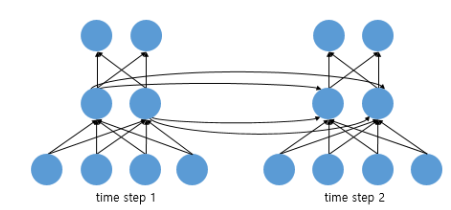

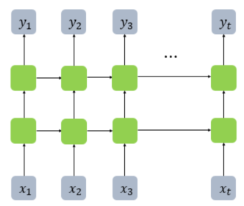

In [68]:
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.001)


In [69]:
print(X.shape, y.shape)

torch.Size([450, 50, 1]) torch.Size([450])


In [70]:
# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(X)
    loss = loss_fn(outputs.squeeze(), y)
    loss.backward()
    opt.step()
    opt.zero_grad()

    if epoch % 10 ==0:
        print(f"{epoch+1}/{num_epochs}, loss {loss.item():.4f}")

1/100, loss 0.4529
11/100, loss 0.3028
21/100, loss 0.1006
31/100, loss 0.0679
41/100, loss 0.0340
51/100, loss 0.0162
61/100, loss 0.0064
71/100, loss 0.0025
81/100, loss 0.0022
91/100, loss 0.0019


(450, 1)


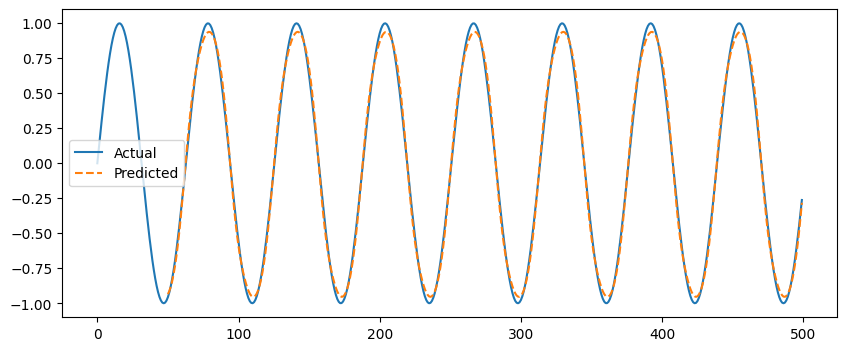

In [75]:
model.eval()
with torch.no_grad():
    preds = model(X).numpy()
    print(preds.shape)

plt.figure(figsize=(10,4))
plt.plot(data, label="Actual")
plt.plot(range(seq_length, seq_length + len(preds)), preds, label="Predicted", linestyle='dashed')
plt.legend()
plt.show()